In [1]:
import pandas as pd
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from random import shuffle
import PIL
from PIL import Image
import copy
import cv2
import glob
import cv2
import os 
from os import path
from skimage.color import lab2rgb
torch.set_default_tensor_type('torch.FloatTensor')
import torch.nn as nn
from torch.nn import Linear, ReLU, MSELoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout, ConvTranspose2d
from torch.optim import Adam, SGD

#Dataset Preparation
img_dir = "./face_images/*"
files = glob.glob(img_dir)
image_names = []
for f1 in files:
    if f1[-1]!='y':
        image_names.append(f1.split('/')[-1])
shuffle(image_names)
horizontal_augment=image_names[:75]

#Augmentation code
for each_image in horizontal_augment:
    im = Image.open('./face_images/'+each_image)
    out = im.transpose(PIL.Image.FLIP_LEFT_RIGHT)
    out.save('./face_images/'+'h'+each_image[:-3]+'.jpg')

In [2]:
#Loading data function
images = []
def load_images_from_folder(folder):
    for filename in os.listdir(folder):
        #print(filename)
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            #print('hi')
            images.append((img,filename))
    return images

filename='./face_images/image00000.jpg'
from skimage import io, color
rgb = io.imread(filename)
lab = color.rgb2lab(rgb)

In [3]:
#LAB images
images = load_images_from_folder("./face_images")
L_images = []
ab_images= []
for img,filename in images:
    imageLAB = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    L, a, b = cv2.split(imageLAB)
    L=np.array(L,dtype=np.float32)
    L=L[np.newaxis,:,:]
    a=np.array(a,dtype=np.float32)
    b=np.array(b,dtype=np.float32)
    ab=[]
    ab.append(a)
    ab.append(b)
    ab=np.array(ab)
    ab_images.append(torch.tensor(ab))
    L_images.append(torch.tensor(L))

L,a,b=cv2.split(lab_images[0])

plt.imshow(L)

cv2.imwrite('av.jpg',L)

os.getcwd()

cv2.imshow('example',L)

import zipfile
path_to_zip_file='./face_images.zip'
directory_to_extract_to='./'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

*Dataset Preparation*

In [4]:
#Train & Test data
train_percentage=70
train_size=int((975/100)*train_percentage)
test_size=975-train_size
all_indices=np.arange(0,975)
np.random.shuffle(all_indices)
train_L=[]
train_ab=[]
test_L=[]
test_ab=[]
for i in all_indices[:train_size]:
    train_L.append(L_images[i])
    train_ab.append(ab_images[i])
for i in all_indices[train_size:]:
    test_L.append(L_images[i])
    test_ab.append(ab_images[i])
train_L=torch.stack(train_L, dim=0)
train_ab=torch.stack(train_ab, dim=0)
test_L=torch.stack(test_L, dim=0)
test_ab=torch.stack(test_ab, dim=0)

In [5]:
train_L

tensor([[[[ 79.,  77.,  76.,  ...,  14.,  14.,  15.],
          [ 78.,  76.,  75.,  ...,  12.,  14.,  14.],
          [ 78.,  76.,  73.,  ...,  14.,  14.,  14.],
          ...,
          [148., 145., 134.,  ..., 103., 101.,  99.],
          [149., 145., 134.,  ..., 102., 100.,  98.],
          [149., 145., 134.,  ..., 102., 100.,  97.]]],


        [[[ 29.,  27.,  24.,  ...,  12.,  16.,  15.],
          [ 28.,  28.,  26.,  ...,  12.,  14.,  14.],
          [ 19.,  23.,  24.,  ...,   9.,   6.,  10.],
          ...,
          [ 71.,  73.,  68.,  ...,  46.,  48.,  50.],
          [ 76.,  76.,  71.,  ...,  43.,  46.,  47.],
          [ 79.,  75.,  69.,  ...,  42.,  46.,  47.]]],


        [[[ 64.,  63.,  54.,  ...,  80.,  73.,  78.],
          [ 61.,  60.,  50.,  ...,  79.,  73.,  74.],
          [ 59.,  57.,  51.,  ...,  78.,  77.,  74.],
          ...,
          [ 61.,  62.,  57.,  ...,  81.,  80.,  87.],
          [ 61.,  58.,  55.,  ...,  80.,  83.,  92.],
          [ 60.,  58.,  55., 

In [6]:
train_L.shape

torch.Size([682, 1, 128, 128])

In [7]:
train_ab

tensor([[[[141., 141., 139.,  ..., 132., 132., 132.],
          [140., 139., 140.,  ..., 132., 132., 132.],
          [140., 139., 141.,  ..., 128., 130., 130.],
          ...,
          [144., 144., 144.,  ..., 147., 147., 147.],
          [144., 144., 143.,  ..., 147., 147., 147.],
          [144., 144., 143.,  ..., 147., 147., 147.]],

         [[137., 137., 137.,  ..., 129., 129., 130.],
          [137., 137., 137.,  ..., 129., 129., 129.],
          [137., 137., 136.,  ..., 131., 130., 130.],
          ...,
          [143., 143., 142.,  ..., 145., 145., 145.],
          [144., 144., 144.,  ..., 145., 145., 145.],
          [144., 144., 144.,  ..., 145., 145., 146.]]],


        [[[129., 130., 130.,  ..., 128., 132., 132.],
          [129., 129., 130.,  ..., 128., 130., 132.],
          [130., 130., 130.,  ..., 128., 130., 130.],
          ...,
          [140., 140., 141.,  ..., 137., 137., 138.],
          [140., 140., 139.,  ..., 138., 138., 138.],
          [140., 141., 140.,  .

In [8]:
train_ab.shape

torch.Size([682, 2, 128, 128])

# Predicting mean a* using Fully Connected Network

# Predicting mean b* using Fully Connected Network

# Convolution Neural Network

In [9]:
#Reshaping the dataset from (128*128*3) to (3*128*128) for training CNNs

In [10]:
class Convnet(nn.Module):   
    def __init__(self):
        super(Convnet, self).__init__()

        self.convolution_layers = Sequential(
            Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(32),
            nn.ReLU(),
            Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(64),
            nn.ReLU(),
            Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(128),
            nn.ReLU(),
            Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(256),
            nn.ReLU(),
            Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(512),
            nn.ReLU()
        )
        
        self.deconvolution_layers = Sequential(
            Conv2d(512, 256, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(256),
            nn.ReLU(),
            Conv2d(256, 128, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(128),
            nn.ReLU(),
            Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(64),
            nn.ReLU(),
            Conv2d(64, 32, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(32),
            nn.ReLU(),
            Conv2d(32, 2, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(2),
            nn.ReLU()
        )


    # Defining the forward pass    
    def forward(self, x):
        x = self.convolution_layers(x)
        x = self.deconvolution_layers(x)
        return x

# Predicting ab combo using CNN

In [11]:
print(torch.backends.mps.is_available())

True


In [12]:
torch.tensor([1,2])

tensor([1, 2])

In [ ]:
device = torch.device("mps" if torch.cuda.is_available() else "cpu")
print(torch.backends.mps.is_available())
device = torch.device(torch.device("mps"))
device="cpu"
print("Device", device)


batch_size = 10
num_epochs = 3
N=train_size
learning_rate = 0.01
batches = int(N/batch_size)
#batch_size=1

model = Convnet()
model = model.float()
model.to(device)

train_data=copy.deepcopy(train_L)
train_data = train_data.to(device)
print("Printing train data shape")
print(train_data.shape)
train_ab = train_ab.to(device)
print("Printing train ab shape")
print(train_ab.shape)
test_data = copy.deepcopy(test_L)
test_data = test_data.to(device)
print("Printing test data shape")
print(test_data.shape)
test_ab = test_ab.to(device)
print("Printing test ab shape")
print(test_ab.shape)


error = nn.MSELoss()  # This works well with the linear output layer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print("batch_size:",batch_size)
print('num_epochs:',num_epochs)
print("learning_rate:",learning_rate)
print("batches:",batches)
print("optimizer:",'Adam')
print("Loss function:","MSELoss")
print(model)

loss_hist = np.zeros(num_epochs)
loss_test_hist = np.zeros(num_epochs)

for epoch in range(num_epochs):
    for index in range(batches):
        patterns = train_data[index*batch_size:(index+1)*batch_size]
        labels = train_ab[index*batch_size:(index+1)*batch_size]
        
        #print("printing all labels shape")
        #print(labels.shape)
        # Forward pass 
        outputs = model(patterns)
        loss = error(outputs, labels)
        

        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()

        #Propagating the error backward
        loss.backward()

        # Optimizing the parameters
        optimizer.step()
        
        #Saving the loss for visualization
        loss_hist[epoch] += loss.data
        

    #test_total
    patterns = test_data
    labels = test_ab
    outputs = model(patterns)
    is_correct = torch.subtract(labels,outputs)
    loss_test_hist[epoch] += (is_correct.sum()*is_correct.sum())/test_size

    #if epoch%25==0:
    print("Epoch: {}, Loss: {:.7f}, Testing Loss: {:.3f}".format( 
                        epoch, loss_hist[epoch], loss_test_hist[epoch]))



plt.figure()
plt.plot(loss_hist)
plt.xlabel("epoch")
plt.ylabel("MSE Loss")
plt.title("Mean a* prediction Training Data Convolutional Neural Network")
plt.legend("Training Loss")
plt.show()

plt.figure()
plt.plot(loss_test_hist)
plt.xlabel("epoch")
plt.ylabel("MSE Loss")
plt.title("Mean a* prediction TestingData Convolutional Neural Network")
plt.legend("Testing Loss")

plt.show()

True
Device cpu
Printing train data shape
torch.Size([682, 1, 128, 128])
Printing train ab shape
torch.Size([682, 2, 128, 128])
Printing test data shape
torch.Size([293, 1, 128, 128])
Printing test ab shape
torch.Size([293, 2, 128, 128])
batch_size: 10
num_epochs: 3
learning_rate: 0.01
batches: 68
optimizer: Adam
Loss function: MSELoss
Convnet(
  (convolution_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

# Predicting mean b* using CNN

Device cpu
batch_size: 100
num_epochs: 500
learning_rate: 0.01
batches: 6
optimizer: Adam
Loss function: MSELoss
Convnet(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=192, out_features=1, bias=Tru

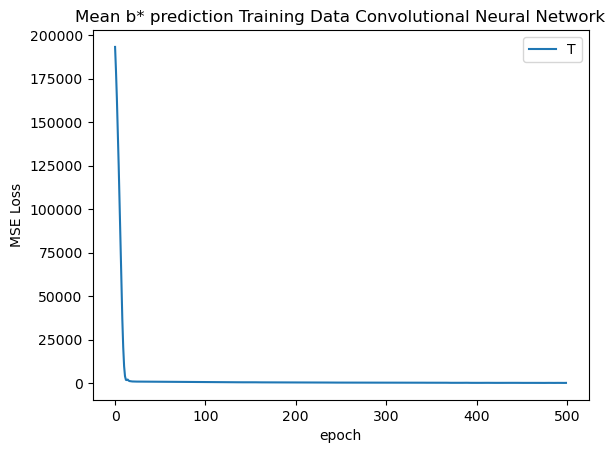

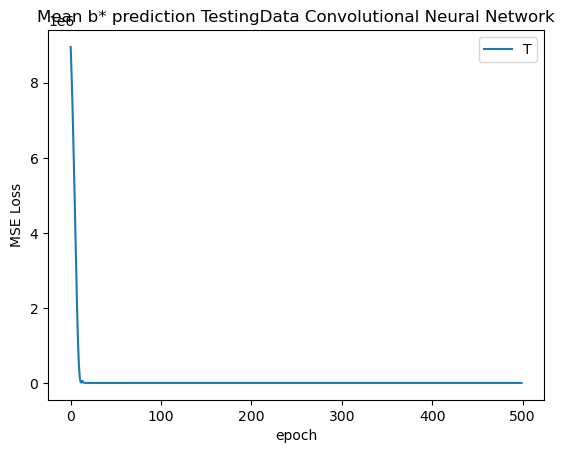

In [150]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device", device)


batch_size = 100
num_epochs = 500
N=train_size
learning_rate = 0.01
batches = int(N/batch_size)

model = Convnet()
model = model.float()
model.to(device)

train_data=copy.deepcopy(new_train_L)
train_data = train_data.to(device)
test_data = copy.deepcopy(new_test_L)
test_data = test_data.to(device)

error = nn.MSELoss()  # This works well with the linear output layer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print("batch_size:",batch_size)
print('num_epochs:',num_epochs)
print("learning_rate:",learning_rate)
print("batches:",batches)
print("optimizer:",'Adam')
print("Loss function:","MSELoss")
print(model)

loss_hist = np.zeros(num_epochs)
loss_test_hist = np.zeros(num_epochs)

for epoch in range(num_epochs):
    for index in range(batches):
        patterns = train_data[index*batch_size:(index+1)*batch_size]
        labels = train_b[index*batch_size:(index+1)*batch_size]

        # Forward pass 
        outputs = model(patterns)
        loss = error(outputs, labels)

        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()

        #Propagating the error backward
        loss.backward()

        # Optimizing the parameters
        optimizer.step()
        
        #Saving the loss for visualization
        loss_hist[epoch] += loss.data
        

    #test_total
    patterns = test_data
    labels = test_b
    outputs = model(patterns)
    is_correct = torch.subtract(labels,outputs)
    loss_test_hist[epoch] += (is_correct.sum()*is_correct.sum())/test_size

    if epoch%25==0:
        print("Epoch: {}, Loss: {:.7f}, Testing Loss: {:.3f}".format( 
                        epoch, loss_hist[epoch], loss_test_hist[epoch]))



plt.figure()
plt.plot(loss_hist)
plt.xlabel("epoch")
plt.ylabel("MSE Loss")
plt.title("Mean b* prediction Training Data Convolutional Neural Network")
plt.legend("Training Loss")
plt.show()

plt.figure()
plt.plot(loss_test_hist)
plt.xlabel("epoch")
plt.ylabel("MSE Loss")
plt.title("Mean b* prediction TestingData Convolutional Neural Network")
plt.legend("Testing Loss")
plt.show()

# Convolution Neural Network for mean a* prediction with scaled input data

In [146]:
#Scaling the input data

In [151]:
new_train_L=(new_train_L)/torch.max(new_train_L)
new_test_L=(new_test_L)/torch.max(new_test_L)

Device cpu
batch_size: 100
num_epochs: 500
learning_rate: 0.01
batches: 6
optimizer: Adam
Loss function: MSELoss
Convnet(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=192, out_features=1, bias=Tru

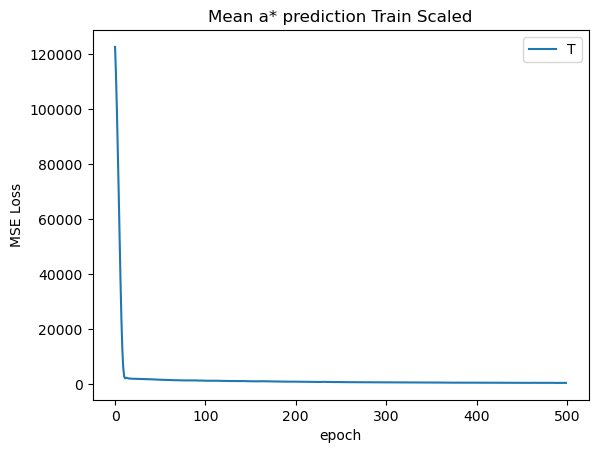

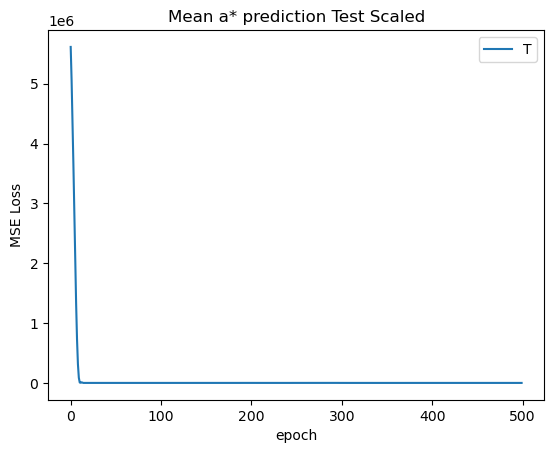

In [152]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device", device)


batch_size = 100
num_epochs = 500
N=train_size
learning_rate = 0.01
batches = int(N/batch_size)

model = Convnet()
model = model.float()
model.to(device)

train_data=copy.deepcopy(new_train_L)
train_data = train_data.to(device)
test_data = copy.deepcopy(new_test_L)
test_data = test_data.to(device)

error = nn.MSELoss()  # This works well with the linear output layer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print("batch_size:",batch_size)
print('num_epochs:',num_epochs)
print("learning_rate:",learning_rate)
print("batches:",batches)
print("optimizer:",'Adam')
print("Loss function:","MSELoss")
print(model)

loss_hist = np.zeros(num_epochs)
loss_test_hist = np.zeros(num_epochs)

for epoch in range(num_epochs):
    for index in range(batches):
        patterns = train_data[index*batch_size:(index+1)*batch_size]
        labels = train_a[index*batch_size:(index+1)*batch_size]

        # Forward pass 
        outputs = model(patterns)
        loss = error(outputs, labels)

        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()

        #Propagating the error backward
        loss.backward()

        # Optimizing the parameters
        optimizer.step()
        
        #Saving the loss for visualization
        loss_hist[epoch] += loss.data
        

    #test_total
    patterns = test_data
    labels = test_a
    outputs = model(patterns)
    is_correct = torch.subtract(labels,outputs)
    loss_test_hist[epoch] += (is_correct.sum()*is_correct.sum())/test_size

    if epoch%25==0:
        print("Epoch: {}, Loss: {:.7f}, Testing Loss: {:.3f}".format( 
                        epoch, loss_hist[epoch], loss_test_hist[epoch]))



plt.figure()
plt.plot(loss_hist)
plt.xlabel("epoch")
plt.ylabel("MSE Loss")
plt.title("Mean a* prediction Train Scaled")
plt.legend("Training Loss")
plt.show()

plt.figure()
plt.plot(loss_test_hist)
plt.xlabel("epoch")
plt.ylabel("MSE Loss")
plt.title("Mean a* prediction Test Scaled")
plt.legend("Testing Loss")

plt.show()

# Convolution Neural Network for mean b* prediction with scaled input data

Device cpu
batch_size: 100
num_epochs: 500
learning_rate: 0.01
batches: 6
optimizer: Adam
Loss function: MSELoss
Convnet(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=192, out_features=1, bias=Tru

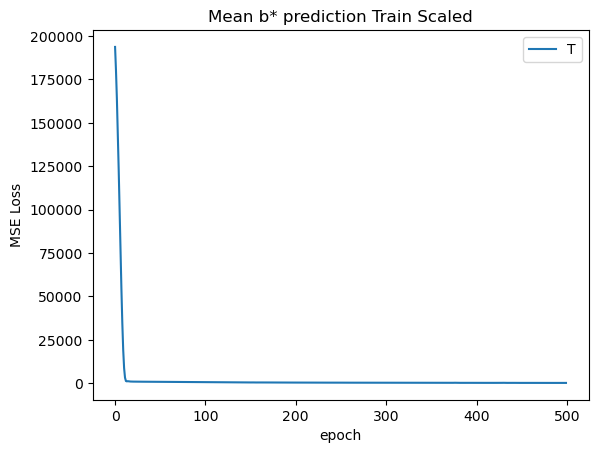

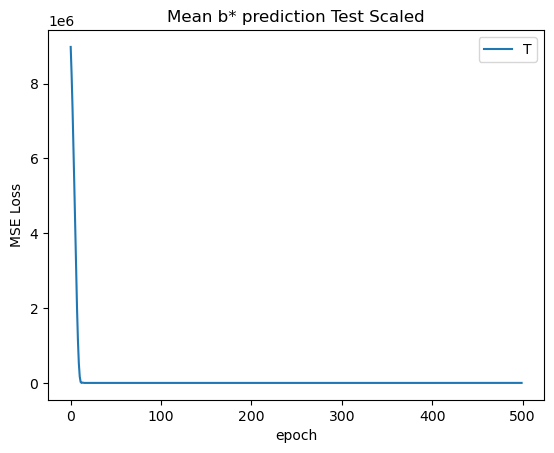

In [153]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device", device)


batch_size = 100
num_epochs = 500
N=train_size
learning_rate = 0.01
batches = int(N/batch_size)

model = Convnet()
model = model.float()
model.to(device)

train_data=copy.deepcopy(new_train_L)
train_data = train_data.to(device)
test_data = copy.deepcopy(new_test_L)
test_data = test_data.to(device)

error = nn.MSELoss()  # This works well with the linear output layer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print("batch_size:",batch_size)
print('num_epochs:',num_epochs)
print("learning_rate:",learning_rate)
print("batches:",batches)
print("optimizer:",'Adam')
print("Loss function:","MSELoss")
print(model)

loss_hist = np.zeros(num_epochs)
loss_test_hist = np.zeros(num_epochs)

for epoch in range(num_epochs):
    for index in range(batches):
        patterns = train_data[index*batch_size:(index+1)*batch_size]
        labels = train_b[index*batch_size:(index+1)*batch_size]

        # Forward pass 
        outputs = model(patterns)
        loss = error(outputs, labels)

        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()

        #Propagating the error backward
        loss.backward()

        # Optimizing the parameters
        optimizer.step()
        
        #Saving the loss for visualization
        loss_hist[epoch] += loss.data
        

    #test_total
    patterns = test_data
    labels = test_b
    outputs = model(patterns)
    is_correct = torch.subtract(labels,outputs)
    loss_test_hist[epoch] += (is_correct.sum()*is_correct.sum())/test_size

    if epoch%25==0:
        print("Epoch: {}, Loss: {:.7f}, Testing Loss: {:.3f}".format( 
                        epoch, loss_hist[epoch], loss_test_hist[epoch]))



plt.figure()
plt.plot(loss_hist)
plt.xlabel("epoch")
plt.ylabel("MSE Loss")
plt.title("Mean b* prediction Train Scaled")
plt.legend("Training Loss")
plt.show()

plt.figure()
plt.plot(loss_test_hist)
plt.xlabel("epoch")
plt.ylabel("MSE Loss")
plt.title("Mean b* prediction Test Scaled")
plt.legend("Testing Loss")

plt.show()